In [2]:
from import_src import import_src
import_src()

Append /home/tungpth/MLOpsVN/src to sys.path


In [3]:
from raw_data_processor import RawDataProcessor

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from plotly import express as px

In [5]:
SRC_DIR = '../../data/raw_data/phase-1/prob-1'

In [6]:
df = pd.read_parquet(os.path.join(SRC_DIR, 'raw_train.parquet'))
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
0,Site engineer,grocery_pos,8.60,48230,40.213439,-85.203756,47583,42.508293,-83.168004,65.596062,3,5,1,1,8.017865,1.028822,58.911132
1,Site engineer,gas_transport,316.84,48230,44.379391,-82.859721,47583,42.661838,-81.966510,64.728795,6,5,1,1,11.768568,1.106217,64.431017
2,Site engineer,grocery_pos,294.89,48230,42.950657,-84.935542,47583,42.580470,-82.408529,65.434606,3,5,1,1,7.996359,0.899881,57.545348
3,Site engineer,shopping_net,831.08,48230,39.372111,-84.893973,47583,41.948688,-83.919881,64.990422,23,6,1,1,8.767720,1.062966,62.681169
4,Site engineer,health_fitness,1063.84,48230,41.227499,-83.228392,47583,41.544743,-82.123365,65.316083,23,6,1,1,8.816222,0.722446,63.084486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134196,Minerals surveyor,health_fitness,132.98,32210,30.570251,-80.001638,847415,29.725058,-81.319645,31.785767,23,4,2,0,6.930241,0.585582,61.754724
134197,Minerals surveyor,health_fitness,2.19,32210,29.150371,-81.719344,847415,31.233001,-81.786202,30.800002,23,3,2,0,7.432464,0.424970,61.681467
134198,Minerals surveyor,kids_pets,3.16,32210,34.212880,-80.634963,847415,29.874284,-81.624591,30.641819,23,6,2,0,7.640235,0.288538,65.003013
134199,Minerals surveyor,entertainment,7.12,32210,28.515650,-80.139073,847415,29.502540,-82.612350,30.809930,20,5,2,0,4.193106,0.489005,66.160873


In [7]:
feature_config = json.load(open(os.path.join(SRC_DIR, 'features_config.json')))
feature_config

{'numeric_columns': ['feature3',
  'feature4',
  'feature5',
  'feature6',
  'feature7',
  'feature8',
  'feature9',
  'feature10',
  'feature11',
  'feature12',
  'feature13',
  'feature14',
  'feature15',
  'feature16'],
 'category_columns': ['feature2', 'feature1'],
 'target_column': 'label',
 'ml_type': 'classification'}

In [8]:
df.describe()

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
count,134201.000000,134201.000000,134201.000000,134201.000000,1.342010e+05,134201.000000,134201.000000,134201.000000,134201.000000,134201.000000,134201.000000,134201.000000,134201.000000,134201.000000,134201.000000
mean,98.995174,50721.258828,37.236698,-91.838641,2.938540e+05,37.234688,-91.844922,48.272938,12.727856,3.477903,1.502955,0.063315,7.496061,0.531774,66.236701
std,205.881662,29578.182334,5.719516,16.339139,5.527133e+05,5.384578,16.224433,16.670031,7.048741,1.993885,0.536319,0.243530,2.003049,0.234250,5.253395
min,1.000000,1106.000000,11.873034,-173.219906,1.940000e+02,18.798261,-169.019669,23.447657,0.000000,0.000000,1.000000,0.000000,-1.003550,-0.342748,42.803103
25%,9.900000,28152.000000,33.367728,-98.892598,1.671900e+04,33.602904,-98.069477,34.949863,7.000000,2.000000,1.000000,0.000000,6.142307,0.375778,62.775925
50%,48.590000,46222.000000,37.492299,-87.142421,6.200900e+04,37.544626,-86.945641,44.951903,14.000000,4.000000,1.000000,0.000000,7.498909,0.517059,66.315780
75%,90.840000,78045.000000,41.133355,-79.599335,2.475300e+05,40.976075,-80.010288,58.638520,19.000000,5.000000,2.000000,0.000000,8.849046,0.666756,69.783914
max,15861.400000,99791.000000,76.845878,-63.066068,2.906700e+06,71.485302,-69.133860,97.121303,23.000000,6.000000,3.000000,1.000000,16.812962,1.703339,88.834367


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134201 entries, 0 to 134200
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   feature1   134201 non-null  object 
 1   feature2   134201 non-null  object 
 2   feature3   134201 non-null  float64
 3   feature4   134201 non-null  int64  
 4   feature5   134201 non-null  float64
 5   feature6   134201 non-null  float64
 6   feature7   134201 non-null  int64  
 7   feature8   134201 non-null  float64
 8   feature9   134201 non-null  float64
 9   feature10  134201 non-null  float64
 10  feature11  134201 non-null  int64  
 11  feature12  134201 non-null  int64  
 12  feature13  134201 non-null  int64  
 13  label      134201 non-null  int64  
 14  feature14  134201 non-null  float64
 15  feature15  134201 non-null  float64
 16  feature16  134201 non-null  float64
dtypes: float64(9), int64(6), object(2)
memory usage: 17.4+ MB


In [10]:
df_numeric = df[feature_config['numeric_columns']]
df_categorical = df[feature_config['category_columns']]
series_label = df['label']

# Univariate

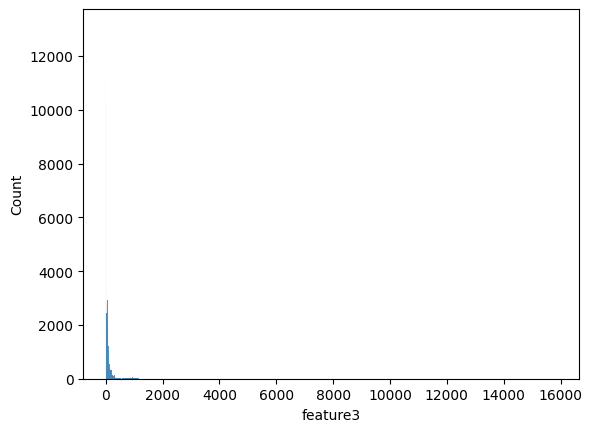

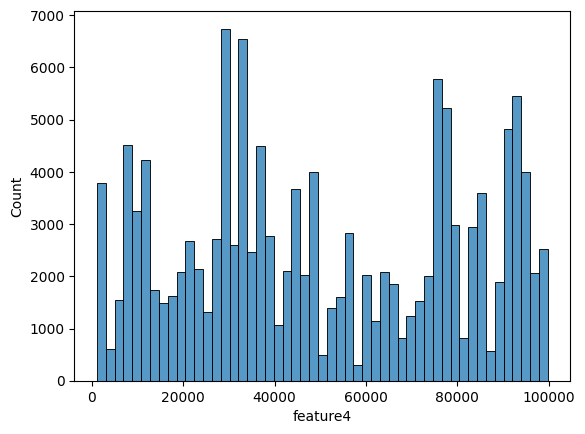

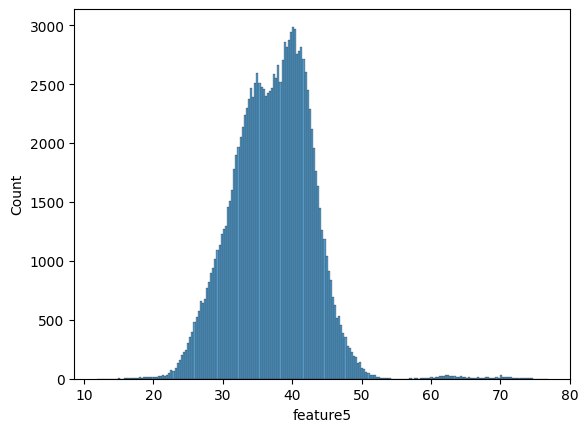

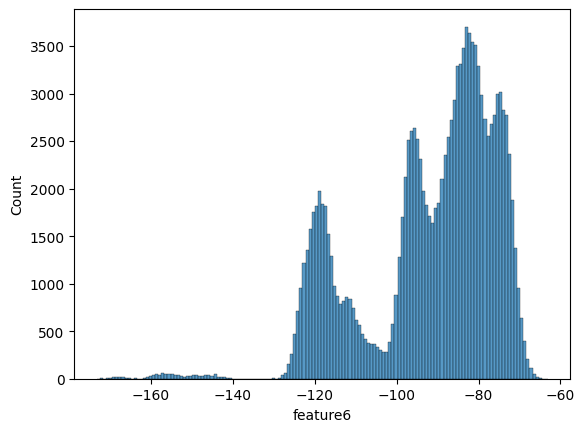

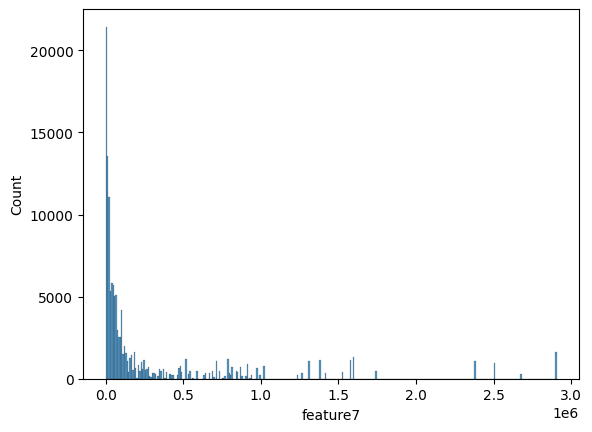

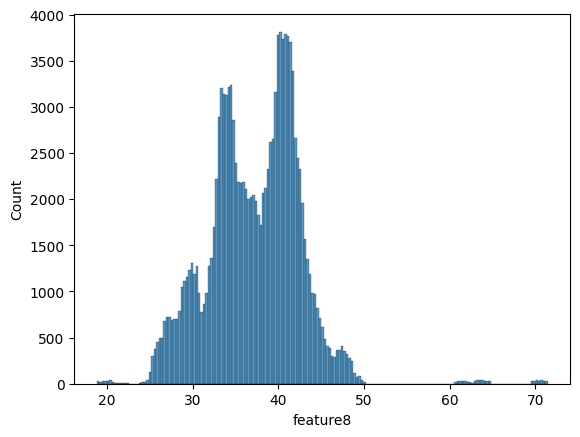

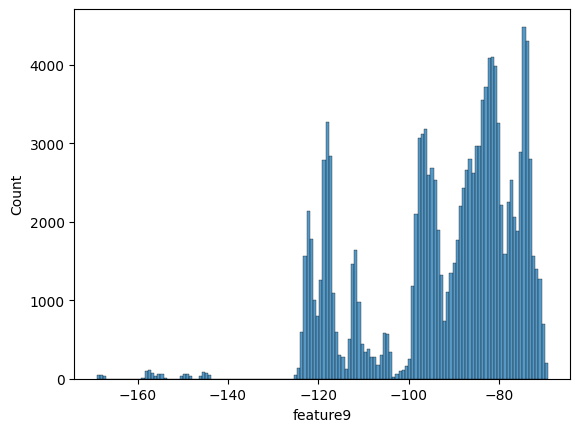

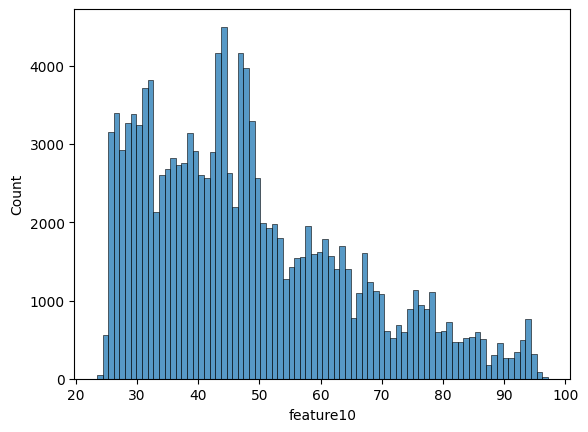

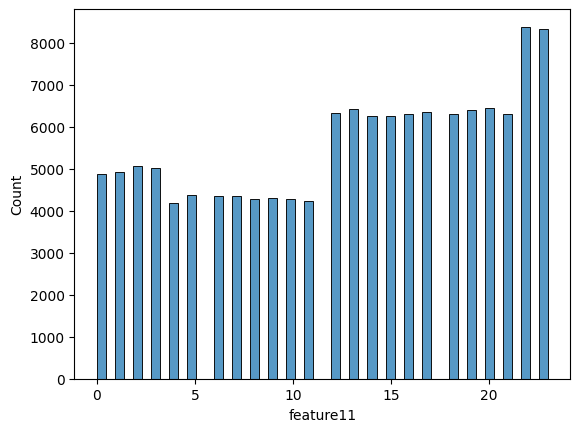

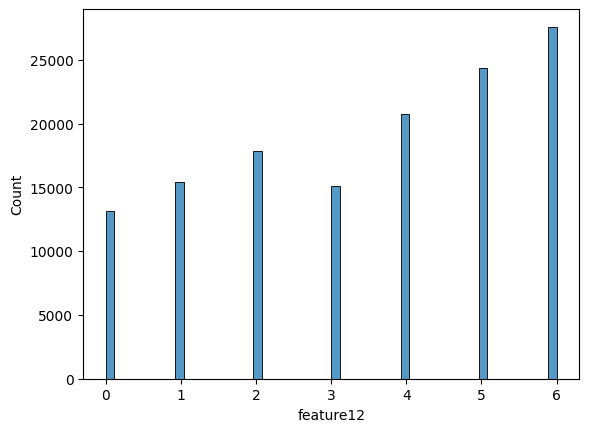

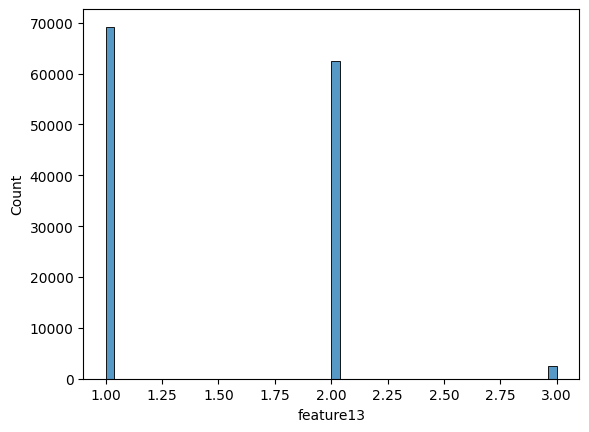

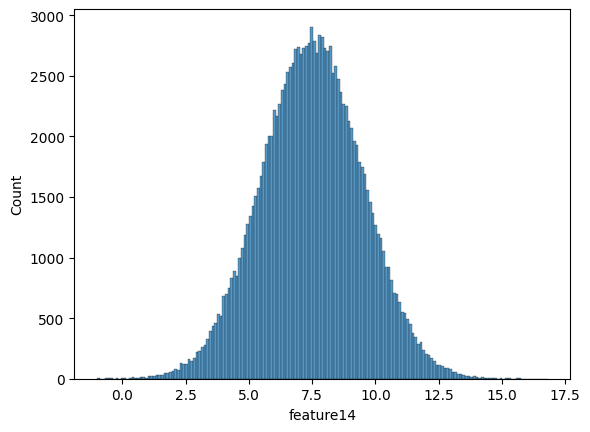

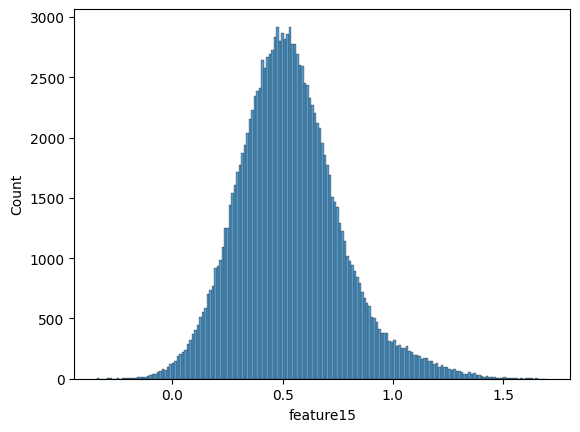

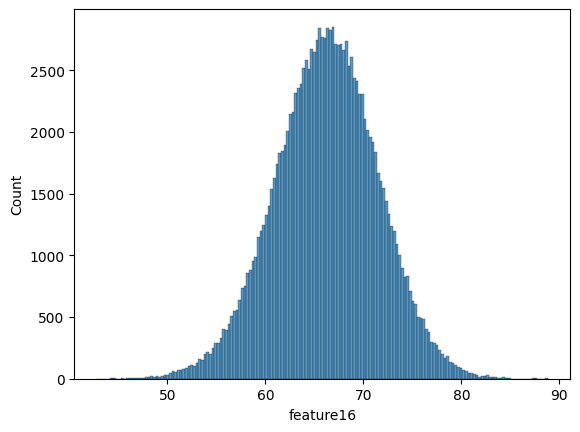

In [11]:
for col in df_numeric.columns:
    sns.histplot(df_numeric[col])
    plt.show()

In [12]:
for col in df_categorical.columns:
    display(df_categorical[col].value_counts())

feature2
grocery_pos       14217
shopping_pos      13133
home              12471
kids_pets         11295
gas_transport     10898
shopping_net      10879
food_dining        9633
personal_care      9526
entertainment      9171
misc_pos           8730
health_fitness     7735
misc_net           6681
grocery_net        5556
travel             4276
Name: count, dtype: int64

feature1
Therapist, speech and language     1026
Museum education officer            909
Press photographer                  902
Geophysicist/field seismologist     898
Tour manager                        861
                                   ... 
Investment analyst                    7
Furniture conservator/restorer        7
Physiological scientist               7
Mining engineer                       7
Community education officer           7
Name: count, Length: 481, dtype: int64

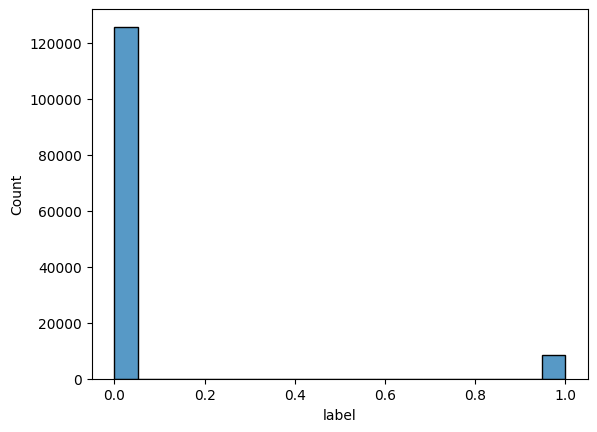

In [13]:
sns.histplot(series_label)
plt.show()

# Bi-variate

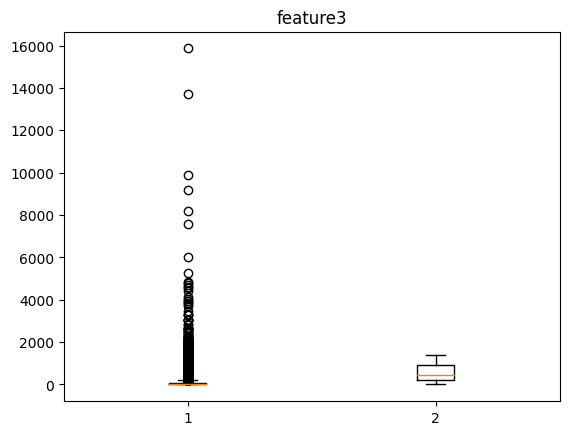

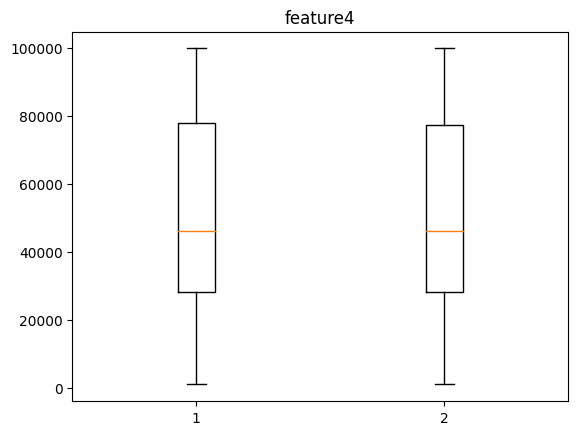

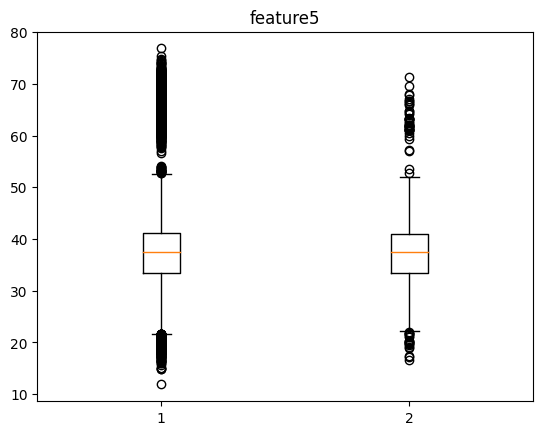

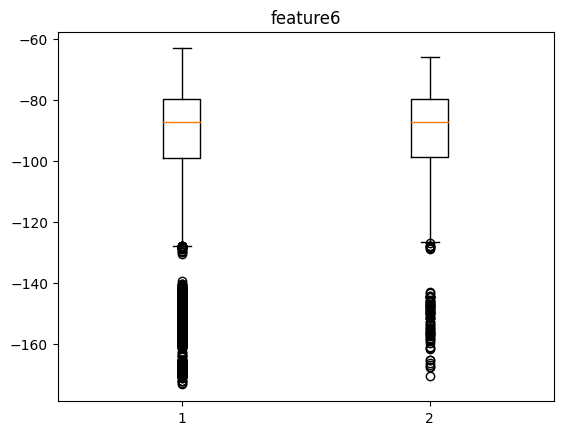

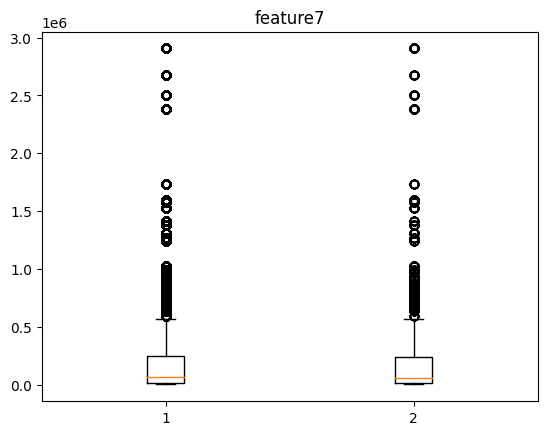

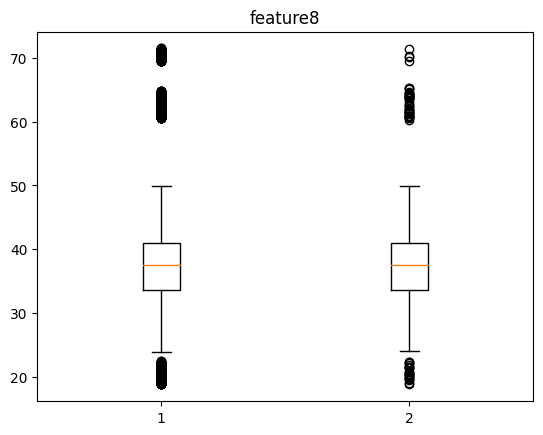

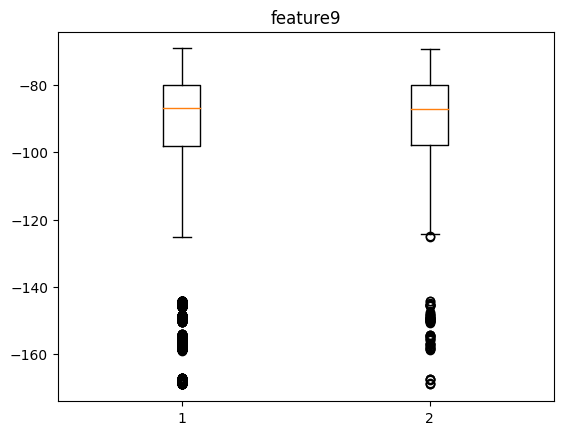

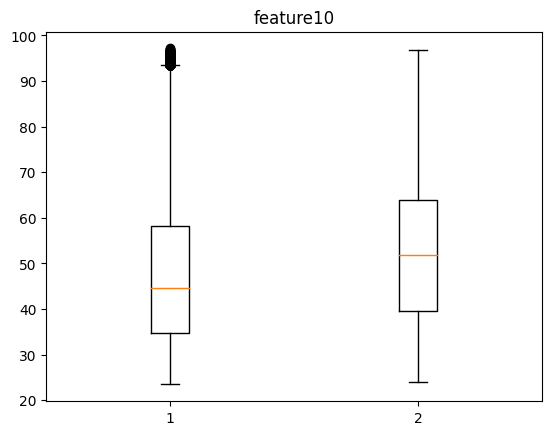

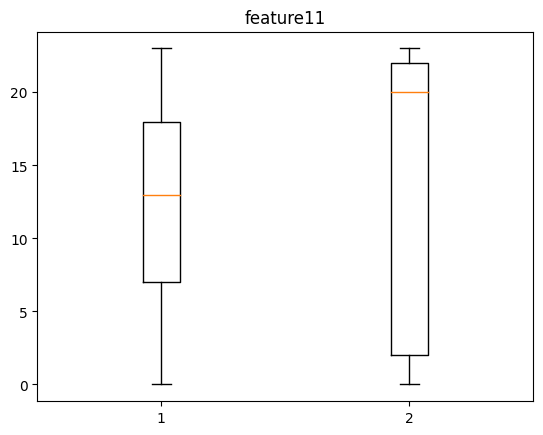

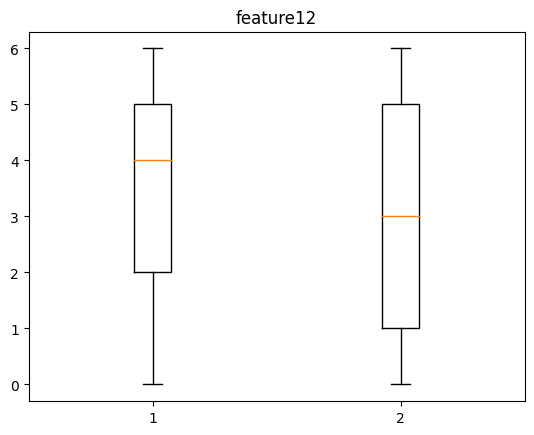

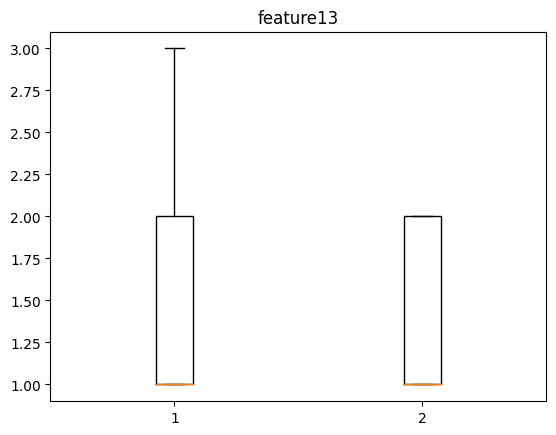

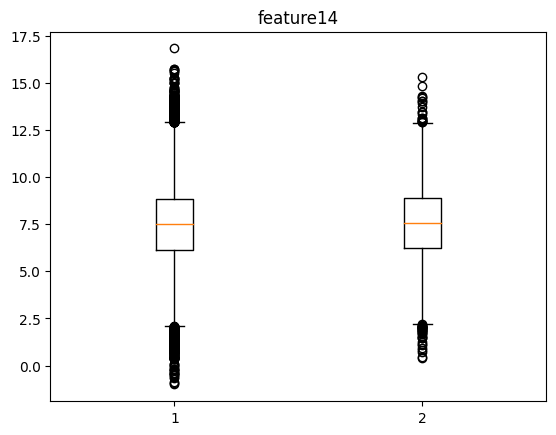

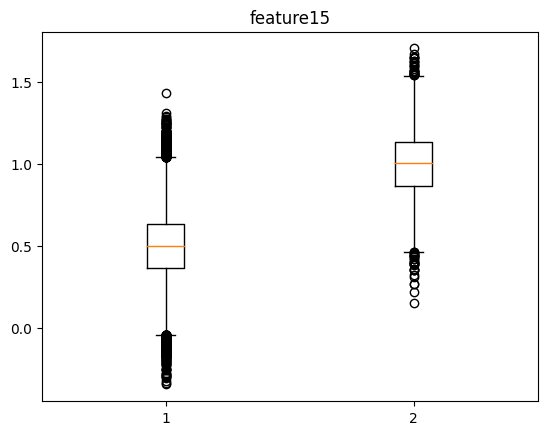

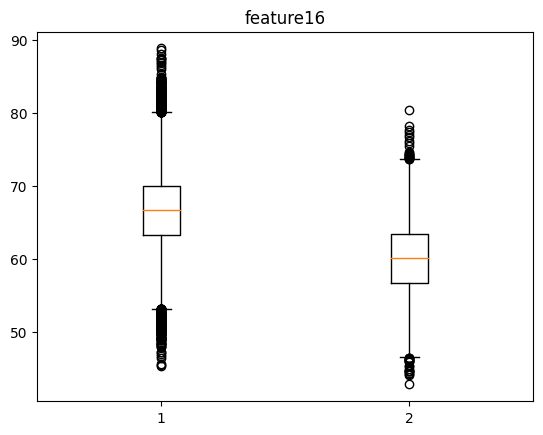

In [14]:
for col in df_numeric.columns:
    data = [df_numeric[col][series_label==0], df_numeric[col][series_label==1]]
    plt.boxplot(data)
    plt.title(col)
    plt.show()

In [32]:
from scipy.stats import kstest, chi2_contingency

In [20]:
kstest(df['feature4'][df['label']==0], df['feature4'][df['label']==1])

KstestResult(statistic=0.015066394740822942, pvalue=0.05337972239974087, statistic_location=71923, statistic_sign=-1)

In [21]:
kstest(df['feature7'][df['label']==0], df['feature7'][df['label']==1])

KstestResult(statistic=0.022485393802647136, pvalue=0.00062951975601845, statistic_location=78968, statistic_sign=-1)

Feature 4, Feature 7 không có nhiều ý nghĩa

In [28]:
df_onehot = pd.get_dummies(df['feature2'], dtype='float')
df_onehot['label'] = df['label']
df_onehot

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,label
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134196,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
134197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
134198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
134199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [31]:
df_onehot.corr().style.background_gradient(cmap='Oranges')

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,label
entertainment,1.000000,-0.075315,-0.080517,-0.056284,-0.093227,-0.066980,-0.086687,-0.082103,-0.061992,-0.071439,-0.074863,-0.080441,-0.089201,-0.049133,-0.038158
food_dining,-0.075315,1.000000,-0.082673,-0.057791,-0.095724,-0.068773,-0.089008,-0.084301,-0.063652,-0.073352,-0.076868,-0.082595,-0.091589,-0.050449,-0.048829
gas_transport,-0.080517,-0.082673,1.000000,-0.061783,-0.102336,-0.073524,-0.095156,-0.090125,-0.068048,-0.078419,-0.082177,-0.088300,-0.097916,-0.053934,0.000447
grocery_net,-0.056284,-0.057791,-0.061783,1.000000,-0.071536,-0.051396,-0.066518,-0.063000,-0.047568,-0.054818,-0.057445,-0.061725,-0.068447,-0.037701,-0.034985
grocery_pos,-0.093227,-0.095724,-0.102336,-0.071536,1.000000,-0.085131,-0.110178,-0.104352,-0.078791,-0.090798,-0.095150,-0.102239,-0.113373,-0.062447,0.094634
health_fitness,-0.066980,-0.068773,-0.073524,-0.051396,-0.085131,1.000000,-0.079158,-0.074972,-0.056608,-0.065235,-0.068361,-0.073454,-0.081454,-0.044866,-0.043292
home,-0.086687,-0.089008,-0.095156,-0.066518,-0.110178,-0.079158,1.000000,-0.097031,-0.073263,-0.084428,-0.088474,-0.095066,-0.105419,-0.058066,-0.060452
kids_pets,-0.082103,-0.084301,-0.090125,-0.063000,-0.104352,-0.074972,-0.097031,1.000000,-0.069389,-0.079964,-0.083796,-0.090039,-0.099844,-0.054996,-0.055121
misc_net,-0.061992,-0.063652,-0.068048,-0.047568,-0.078791,-0.056608,-0.073263,-0.069389,1.000000,-0.060376,-0.063270,-0.067984,-0.075387,-0.041524,0.095381
misc_pos,-0.071439,-0.073352,-0.078419,-0.054818,-0.090798,-0.065235,-0.084428,-0.079964,-0.060376,1.000000,-0.072912,-0.078345,-0.086877,-0.047853,-0.032351


In [64]:
contingency_table = df[['feature2', 'label']].reset_index().groupby(['feature2','label'])['index'].count().reset_index().pivot(index='feature2', columns='label', values='index')
# contingency_table

In [65]:
contingency_table.apply(lambda x: x/sum(x), axis=1).style.background_gradient(cmap='Oranges', axis=None)

label,0,1
feature2,,
entertainment,0.970996,0.029004
food_dining,0.979446,0.020554
gas_transport,0.936319,0.063681
grocery_net,0.977682,0.022318
grocery_pos,0.869733,0.130267
health_fitness,0.979315,0.020685
home,0.982680,0.017320
kids_pets,0.980965,0.019035
misc_net,0.835204,0.164796


In [81]:
df['target_encoding'] = df[['feature1', 'label']].groupby('feature1')['label'].transform("mean")
# df['target_encoding']

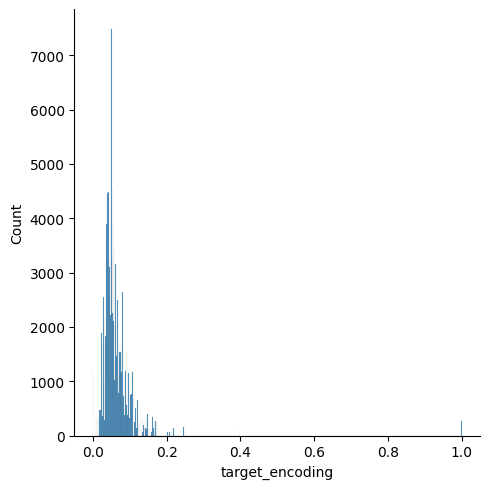

In [82]:
sns.displot(df['target_encoding'])

In [85]:
df[df['target_encoding']==df['target_encoding'].max()]['feature1'].value_counts()

feature1
Haematologist                      18
Development worker, community      12
Professor Emeritus                 12
Producer, television/film/video    12
Freight forwarder                  12
Careers adviser                    11
Technical brewer                   11
Homeopath                          11
Financial planner                  11
Dancer                             11
Theme park manager                 11
Pharmacist, community              11
Ranger/warden                      10
Librarian, academic                10
Restaurant manager                 10
Pathologist                        10
Chief Executive Officer             9
Insurance account manager           9
Ecologist                           9
Teacher, adult education            8
Pharmacist, hospital                8
Education administrator             8
Chartered accountant                8
Physiological scientist             7
Mining engineer                     7
Community education officer         7
Fur

In [88]:
sorted(df['feature1'].unique())

['Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accounting technician',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, education',
 'Administrator, local government',
 'Adult guidance worker',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Animal technologist',
 'Applications developer',
 'Arboriculturist',
 'Archaeologist',
 'Architect',
 'Architectural technologist',
 'Archivist',
 'Armed forces logistics/support/administrative officer',
 'Armed forces operational officer',
 'Armed forces technical officer',
 'Armed forces training and education officer',
 'Art gallery man

In [95]:
df[df['feature1'].str.startswith('Clinical')]['target_encoding'].unique()

array([0.04545455, 0.10727969, 0.09016393, 0.06145251, 0.14705882,
       0.04237288])

Có nên gom nhóm không nhỉ?